## Import relevant libraries and functions

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from ema_workbench import (
    Policy,
    ema_logging,
    save_results,
    MultiprocessingEvaluator, 
    load_results,
    Samplers,
    Scenario
)

from ema_workbench.analysis import pairs_plotting
from problem_formulation import get_model_for_problem_formulation

## Prepare model and parameters
The dike model gets imported using the problem formulation. This problem formulation decides the outcomes that the model puts out.

In [2]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(2)

# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

# Open Exploration

## Run and save open exploration experiments

In [3]:
# set number of experiments and run them
n_exp = 3000

with MultiprocessingEvaluator(dike_model) as evaluator:
    oe_results = evaluator.perform_experiments(scenarios=n_exp, policies=50, uncertainty_sampling=Samplers.LHS)

experiments_oe, outcomes_oe = oe_results

# save results
save_results(oe_results, '3.1 results_LHS_3000x50.tar.gz')

[MainProcess/INFO] pool started with 16 workers
[MainProcess/INFO] performing 3000 scenarios * 50 policies * 1 model(s) = 150000 experiments
100%|████████████████████████████████| 150000/150000 [2:15:52<00:00, 18.40it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to C:\Users\31650\OneDrive - Delft University of Technology\Documents\Python\modelbased\final assignment\3.1 results_LHS_3000x50.tar.gz


## Analyse open exploration
Plot the results in a pair plot to get more insight into the behaviour of the model.

[MainProcess/INFO] no time dimension found in results


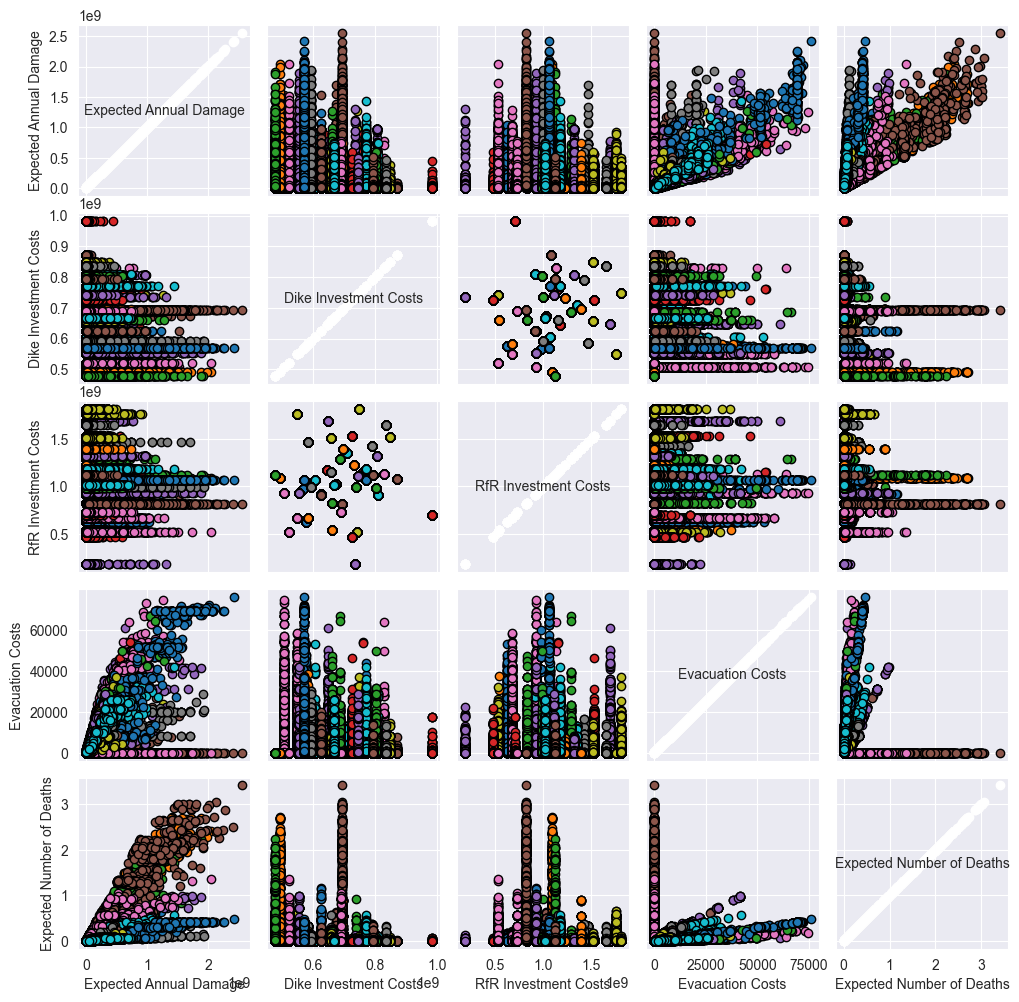

In [4]:
# plot experiments and outcomes, grouped by policy

fig, axes = pairs_plotting.pairs_scatter(experiments_oe, outcomes_oe, group_by='policy', legend=False)
fig.set_size_inches(12, 12)
plt.show()

# Sensitivity Analysis

## Define zero policy and reference scenario
The zero policy is used to explore uncertainty in the model. Given the zero policy, how does the model react to changes in uncertainties in different scenario's? The same goes for the levers; given the reference scenario, how does the model react to change in policy levers? The following values are used for the ‘reference
scenario’: {'Bmax': 175, 'Brate': 1.5, 'pfail': 0.5, 'discount rate': 2.5, 'ID flood wave shape': 4}.
These values are not extreme values, but can be seen as an average scenario.

In [5]:
# define zero policy

def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}

zeropolicy = Policy("zero policy",**dict(get_do_nothing_dict()))

In [6]:
# define reference scenario

reference_scenario = Scenario('Reference Scenario', **dict({
    'discount rate 0': 2.5,
    'discount rate 1': 2.5,
    'discount rate 2': 2.5,
    'A.0_ID flood wave shape': 4,
    'A.1_Bmax': 175,
    'A.2_Bmax': 175,
    'A.3_Bmax': 175,
    'A.4_Bmax': 175,
    'A.5_Bmax': 175,
    'A.1_pfail': 0.5,
    'A.2_pfail': 0.5,
    'A.3_pfail': 0.5,
    'A.4_pfail': 0.5,
    'A.5_pfail': 0.5,
    'A.1_Brate': 1.5,
    'A.2_Brate': 1.5,
    'A.3_Brate': 1.5,
    'A.4_Brate': 1.5,
    'A.5_Brate': 1.5
}))

## Sensitivity analysis with Sobol

In [7]:
# use multiprocessing for speed and Sobol sampling for SA

with MultiprocessingEvaluator(dike_model) as evaluator:
    sa_results_levers = evaluator.perform_experiments(scenarios=reference_scenario, policies=5000, lever_sampling=Samplers.SOBOL)

experiments_sa_levers, outcomes_sa_levers = sa_results_levers

save_results(sa_results_levers, '3.2 results_levers_SOBOL_1x5000.tar.gz')

[MainProcess/INFO] pool started with 16 workers
C:\Users\31650\OneDrive - Delft University of Technology\Documents\Python\Environments\Model-Based\Lib\site-packages\scipy\stats\_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
[MainProcess/INFO] performing 1 scenarios * 320000 policies * 1 model(s) = 320000 experiments
100%|████████████████████████████████| 320000/320000 [4:53:17<00:00, 18.18it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to C:\Users\31650\OneDrive - Delft University of Technology\Documents\Python\modelbased\final assignment\3.2 results_levers_SOBOL_1x5000.tar.gz


In [8]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    sa_results_scenarios = evaluator.perform_experiments(scenarios=10000, policies=zeropolicy, lever_sampling=Samplers.SOBOL)

experiments_sa_scenarios, outcomes_sa_scenarios = sa_results_scenarios

save_results(sa_results_scenarios, '3.2 results_scenarios_SOBOL_50000xzero.tar.gz')

[MainProcess/INFO] pool started with 16 workers
[MainProcess/INFO] performing 10000 scenarios * 1 policies * 1 model(s) = 10000 experiments
100%|████████████████████████████████████| 10000/10000 [09:45<00:00, 17.08it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to C:\Users\31650\OneDrive - Delft University of Technology\Documents\Python\modelbased\final assignment\3.2 results_scenarios_SOBOL_10000xzero.tar.gz
